In [65]:
# -*- coding: utf-8 -*-
"""
@author: Saumitra Kulkarni
"""

import warnings
warnings.filterwarnings("ignore")

from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dataset

We will use Breast Cancer Data Set

Ref.: https://archive.ics.uci.edu/ml/datasets/breast+cancer

Note: sklean breast cancer data is used for training the model in order to 
classify / predict the breast cancer.


In [2]:
bc = datasets.load_breast_cancer()

X = bc.data
y = bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [30]:
len(X_train)+len(X_test); 
len(X)

569

## Information about initial training and testing datasets

In [4]:
print ("Number of training examples: " + str(X_train.shape[0]))
print ("Number of testing examples: " + str(X_test.shape[0]))

print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))

Number of training examples: 398
Number of testing examples: 171
X_train shape: (398, 30)
y_train shape: (398,)
X_test shape: (171, 30)
y_test shape: (171,)


## Information about modified training and testing datasets

In [47]:
X_train = X_train.T/len(X) # Standardize the dataset.
X_test = X_test.T/len(X) # # Standardize the dataset.
y_train = y_train.reshape(1,-1)
y_test = y_test.reshape(1,-1)

print ("X_train_reshape shape: " + str(X_train_reshape.shape))
print ("y_train_reshape shape: " + str(y_train_reshape.shape))
print ("X_test_reshape shape: " + str(X_test_reshape.shape))
print ("y_test_reshape shape: " + str(y_test_reshape.shape))

X_train_reshape shape: (30, 398)
y_train_reshape shape: (1, 398)
X_test_reshape shape: (30, 171)
y_test_reshape shape: (1, 171)


## Modelling Logistic Regression as Neural Networks

In [61]:
from Deep_NN import Deep_NN

layers_dims = [30, 15, 5, 1]

In [80]:
model = Deep_NN(layers_dims, print_cost=True)

parameters, costs = model.fit(X_train, y_train)

y_predict_test = model.predict(X_test, parameters)
y_predict_train = model.predict(X_train, parameters)

print("Train Score: ",model.score(X_train, y_train, parameters))

print("Test Score: ",model.score(X_test, y_test, parameters))

Cost after iteration 0: 0.6844188502395963
Cost after iteration 100: 0.640013768690663
Cost after iteration 200: 0.5955777340749939
Cost after iteration 300: 0.5657138344487601
Cost after iteration 400: 0.546466892054597
Cost after iteration 500: 0.5334061186330886
Cost after iteration 600: 0.5231439257262747
Cost after iteration 700: 0.5032771819838534
Cost after iteration 800: 0.4642435933559509
Cost after iteration 900: 0.41168166684436597
Cost after iteration 1000: 0.3596790862358469
Cost after iteration 1100: 0.32192720619188575
Cost after iteration 1200: 0.30101566078270403
Cost after iteration 1300: 0.2932441729590756
Cost after iteration 1400: 0.29387745737521126
Cost after iteration 1500: 0.29887197824791706
Cost after iteration 1600: 0.30555376978183296
Cost after iteration 1700: 0.31292110116831445
Cost after iteration 1800: 0.31926791608841676
Cost after iteration 1900: 0.32434824344081586
Cost after iteration 2000: 0.32789739401384616
Cost after iteration 2100: 0.330673361

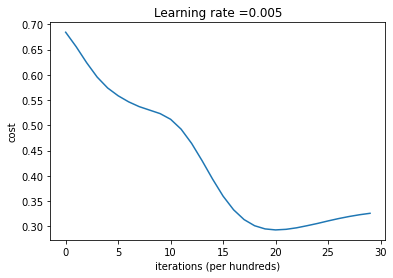

In [76]:
model.plot_costs(costs)

For learning rate : 0.1
Cost after iteration 2999: nan
Train Score:  37.1859296482412
Test Score:  37.42690058479532
-------------------------------------
For learning rate : 0.01
Cost after iteration 2999: 0.33301824519671036
Train Score:  82.41206030150754
Test Score:  80.70175438596492
-------------------------------------
For learning rate : 0.001
Cost after iteration 2999: 0.5465850509416913
Train Score:  90.7035175879397
Test Score:  90.05847953216374
-------------------------------------
For learning rate : 0.0001
Cost after iteration 2999: 0.6679759916916818
Train Score:  42.462311557788944
Test Score:  42.69005847953217
-------------------------------------


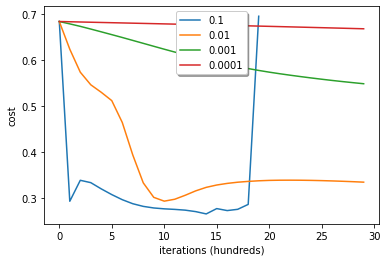

In [74]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]

for i in learning_rates:
    
    print(f"For learning rate : {i}")
    model = Deep_NN(layers_dims, lr = i)

    parameters, costs = model.fit(X_train, y_train)

    y_predict_test = model.predict(X_test, parameters)
    y_predict_train = model.predict(X_train, parameters)

    print("Train Score: ",model.score(X_train, y_train, parameters))
    print("Test Score: ",model.score(X_test, y_test, parameters))
    
    print ("-------------------------------------")
    
    plt.plot(costs, label = str(i))
    
plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)

plt.show()

**Interpretation**: 

- Different learning rates give different costs and thus different predictions results.

- If the learning rate is too large (0.1), the cost may oscillate up and down. It even diverges.

- A lower cost doesn't mean a better model. There is possibly overfitting (0.0001). It may happen when the training accuracy is a lot higher than the test accuracy.

- In deep learning, it is recommended to choose the learning rate that better minimizes the cost function but maximizes the train and test scores (0.001)